# Data Mining 15.0621 Homework Assignment 2
## Questions 6.1, 7.3, 8.2, 9.3
## By: Jonathan Johannemann

In [46]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt,warnings,random,sklearn
from sklearn import *
random.seed(11152016) #Today's Date
warnings.filterwarnings('ignore',category=DeprecationWarning)
%matplotlib inline

## Question 6.1

In [47]:
bostonhousing = pd.read_csv('BostonHousing.csv',sep=',',header=0)
bostonhousing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


### Question 6.1 (a)

The data should be partitioned into training and validation sets because it allows the researcher to receive feedback on his or her model without testing on the true, held out data. The training set is for the model to be trained on. The validation set is for the researcher to test the ability of his or her model. A researcher should never introduce datapoints from the validation set into the training set.

### Question 6.1 (b)

In [48]:
model = sklearn.linear_model.LinearRegression()
model.fit(bostonhousing[['CRIM','CHAS','RM']],bostonhousing['MEDV'])
print "Intercept: ",model.intercept_
print "CRIM coefficient: ",model.coef_[0]
print "CHAS coefficient: ",model.coef_[1]
print "RM coefficient: ",model.coef_[2]
print "\nEquation: \n",model.intercept_, " + ",model.coef_[0],"CRIM + ",model.coef_[1],"CHAS + ",model.coef_[2],"RM = MEDV"

Intercept:  -28.8106825064
CRIM coefficient:  -0.260724411231
CHAS coefficient:  3.76303705211
RM coefficient:  8.27817981154

Equation: 
-28.8106825064  +  -0.260724411231 CRIM +  3.76303705211 CHAS +  8.27817981154 RM = MEDV


### Question 6.1 (c)

In [49]:
query = pd.DataFrame([['0.1','0','6']],columns=['CRIM','CHAS','RM'])
print "The predicted price is: ",model.predict(query)[0]

The predicted price is:  20.8323239217


In [50]:
tmp = bostonhousing[['CRIM','CHAS','RM']]
query_vals = query.values[0].astype('Float64')
index_closest = np.abs(tmp.apply(lambda x: x-query_vals,axis=1).sum(axis=1)).ix[np.abs(tmp.apply(lambda x: x-query_vals,axis=1).sum(axis=1))==np.abs(tmp.apply(lambda x: x-query_vals,axis=1).sum(axis=1)).min()].index[0]
print "The error with respect to the closest value is:", np.abs(bostonhousing.MEDV.ix[index_closest]-model.predict(query)[0])

The error with respect to the closest value is: 2.06767607827


### Question 6.1 (d) i.

In [51]:
corr_mat = bostonhousing[['INDUS','NOX','TAX']].corr()
print corr_mat

          INDUS       NOX       TAX
INDUS  1.000000  0.763651  0.720760
NOX    0.763651  1.000000  0.668023
TAX    0.720760  0.668023  1.000000


Indus is the proportion of nonretail business acres per town.
Nox is nitric oxide concentration.
Tax is full-value property-tax rate per $10,000.
The potential relationsnip here is that businesses create more nitric oxide and result in higher taxed property. Therefore, there is likely a causal relationship from INDUS to NOX and TAX. While it is not east ro 100% confirm this, it appears to be a likely scenario.

### Question 6.1 (d) ii.

In [52]:
corr_mat = bostonhousing.corr()
corr_mat.values[[np.arange(len(corr_mat))]*2]=0
corr_mat = corr_mat[np.abs(corr_mat)>0.6].fillna(0).reset_index()

for col in corr_mat.columns.values[1:]:
    if len(corr_mat[corr_mat[col]!=0][col].index)>0:
        print "="*40
        print "Looking at: ",col
        for i in corr_mat[corr_mat[col]!=0][col].index:
            print corr_mat['index'][i]," : ",corr_mat[corr_mat[col]!=0][col][i]
print "="*40

Looking at:  CRIM
RAD  :  0.625505145263
Looking at:  ZN
DIS  :  0.664408222762
Looking at:  INDUS
NOX  :  0.763651446921
AGE  :  0.644778511355
DIS  :  -0.708026988743
TAX  :  0.720760179952
LSTAT  :  0.603799716477
Looking at:  NOX
INDUS  :  0.763651446921
AGE  :  0.731470103786
DIS  :  -0.769230113226
RAD  :  0.611440563486
TAX  :  0.668023200403
Looking at:  RM
LSTAT  :  -0.613808271866
MEDV  :  0.695359947072
CAT.MEDV  :  0.641265408301
Looking at:  AGE
INDUS  :  0.644778511355
NOX  :  0.731470103786
DIS  :  -0.747880540869
LSTAT  :  0.602338528726
Looking at:  DIS
ZN  :  0.664408222762
INDUS  :  -0.708026988743
NOX  :  -0.769230113226
AGE  :  -0.747880540869
Looking at:  RAD
CRIM  :  0.625505145263
NOX  :  0.611440563486
TAX  :  0.910228188533
Looking at:  TAX
INDUS  :  0.720760179952
NOX  :  0.668023200403
RAD  :  0.910228188533
Looking at:  LSTAT
INDUS  :  0.603799716477
RM  :  -0.613808271866
AGE  :  0.602338528726
MEDV  :  -0.737662726174
Looking at:  MEDV
RM  :  0.6953599470

CAT.MEDV is based off of MEDV so we need to remove that. As discussed before, it seems like INDUS may be influencing NOX and TAX a lot which causes the high correlation. Therefore, we shall remove NOX and TAX.

### Question 6.1 (d) iii.

In [53]:
f = open('data_mining_2.txt','r')
for line in f.readlines():
    print line

   (Intercept) CRIM   ZN INDUS CHAS   RM   AGE  DIS   RAD PTRATIO LSTAT

9         TRUE TRUE TRUE  TRUE TRUE TRUE  TRUE TRUE FALSE    TRUE  TRUE

10        TRUE TRUE TRUE  TRUE TRUE TRUE  TRUE TRUE  TRUE    TRUE  TRUE

8         TRUE TRUE TRUE  TRUE TRUE TRUE FALSE TRUE FALSE    TRUE  TRUE

[1] "Model number: "

[1] 1

[1] "Rsq value is: "

[1] 0.7166852

[1] "Mallow's Cp value is: "

[1] 9.337887

[1] "AICc value is: "

[1] 2463.616

[1] "Training RMSE value is: "

[1] 4.963095

[1] "Cross Validation R^2 value is: "

[1] 0.6859863

[1] "Model number: "

[1] 2

[1] "Rsq value is: "

[1] 0.7169286

[1] "Mallow's Cp value is: "

[1] 11

[1] "AICc value is: "

[1] 2465.393

[1] "Training RMSE value is: "

[1] 4.960962

[1] "Cross Validation R^2 value is: "

[1] 0.6878866

[1] "Model number: "

[1] 3

[1] "Rsq value is: "

[1] 0.7151554

[1] "Mallow's Cp value is: "

[1] 9.461808

[1] "AICc value is: "

[1] 2463.678

[1] "Training RMSE value is: "

[1] 4.976476

[1] "Cross Validation R^2 v

So the problem says to choose the top three models but it does not say what it's based on. Therefore, I decided to choose the top 3 models which searched through all possible combinations given the variables I have. Furthermore, I chose the top 3 with respect to the adjusted R^2 which accounts for the fact that adding more variables can sometimes overfit. (Not a perfect measure, I felt that it was more sound than choosing training R^2 or training MSE). So from what I can see, it looks like there should be a 20% cross validation set and then an 80% training set. Finally, I outputted the RMSE, Cp, AIC, and Validation RSquare. The best model looks like the one that ignores RAD and AGE which is based on the validation RSquare.

## Question 7.3

### Question 7.3 (a)

In [54]:
bostonhousing = pd.read_csv('BostonHousing.csv',sep=',',header=0)
bostonhousing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [55]:
scaler = sklearn.preprocessing.StandardScaler()
columns = list(set(bostonhousing.columns.values)-set(['MEDV','CAT.MEDV']))
for col in columns:
    bostonhousing[col] = scaler.fit_transform(bostonhousing[col])

print bostonhousing.head()

X,Xt,y,yt = sklearn.cross_validation.train_test_split(bostonhousing[columns],bostonhousing.MEDV,test_size=0.4)

       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        DIS       RAD       TAX   PTRATIO     LSTAT  MEDV  CAT.MEDV  
0  0.140214 -0.982843 -0.666608 -1.459000 -1.075562  24.0         0  
1  0.557160 -0.867883 -0.987329 -0.303094 -0.492439  21.6         0  
2  0.557160 -0.867883 -0.987329 -0.303094 -1.208727  34.7         1  
3  1.077737 -0.752922 -1.106115  0.113032 -1.361517  33.4         1  
4  1.077737 -0.752922 -1.106115  0.113032 -1.026501  36.2         1  


C:\Users\Jonathan\Anaconda2\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [56]:
for i in range(1,6):
    knn_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=i)
    knn_model.fit(X,y)
    print "For k = ",i,", R^2 value is:",knn_model.score(Xt,yt)

For k =  1 , R^2 value is: 0.635960617621
For k =  2 , R^2 value is: 0.658436722571
For k =  3 , R^2 value is: 0.719175454499
For k =  4 , R^2 value is: 0.741329524505
For k =  5 , R^2 value is: 0.726678474087


Using 12 variables, it looks like k = 2 has the best performance with respect to R^2 value. This means that the prediction is based on the bucket/leaf that is indicated from the closest 2 observations.

###  Question 7.3 (b)

In [57]:
query = pd.DataFrame([[0.2,0,7,0,0.538,6,62,4.7,4,307,21,10]],columns=list(bostonhousing.columns.values[:12]))
knn_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=2)
knn_model.fit(X,y)
print "For k =",2,", predicted value is:",knn_model.predict(query)

For k = 2 , predicted value is: [ 10.3]


### Question 7.3 (c)

The validation error is still optimistic because we tweak the original model on this data. So, we get an idea of what works and does not work. In an indirect way, we are getting a feel for what works and does not work in the validation set. We, of course, do not get this chance for the test set which is suppose to be our final evaluation. Hence, over time, as we make changes to the model that was trained on the training set based on our evaluation of the validation set, we start to introduce an almost look-ahead bias. This essentially means that we are looking at data and coming up with a model that will of course do well on this set because we have tried multiple things that work and do not work which is something that is not allowed for the test set. Thus, the error for the validation set ends up being overly optimistic because we've taken steps to improve the error on the validation set.

### Question 7.3 (d)

In [58]:
bostonhousing = pd.read_csv('BostonHousing.csv',sep=',',header=0)
scaler = sklearn.preprocessing.StandardScaler()
continuous_columns = list(set(bostonhousing.columns.values)-set(['CHAS','MEDV','CAT.MEDV',]))
for col in continuous_columns:
    bostonhousing[col] = scaler.fit_transform(bostonhousing[col])

print bostonhousing.head(),"\n"

X,Xt,y,yt = sklearn.cross_validation.train_test_split(bostonhousing[columns],bostonhousing.MEDV,test_size=0.4)

for i in range(1,6):
    knn_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=i)
    knn_model = knn_model.fit(X,y)
    print "For k = ",i,", R^2 value is:",knn_model.score(Xt,yt)
    
print "\nFor k =",2,", predicted value is:",knn_model.predict(query)

       CRIM        ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0 -0.419782  0.284830 -1.287909     0 -0.144217  0.413672 -0.120013  0.140214   
1 -0.417339 -0.487722 -0.593381     0 -0.740262  0.194274  0.367166  0.557160   
2 -0.417342 -0.487722 -0.593381     0 -0.740262  1.282714 -0.265812  0.557160   
3 -0.416750 -0.487722 -1.306878     0 -0.835284  1.016303 -0.809889  1.077737   
4 -0.412482 -0.487722 -1.306878     0 -0.835284  1.228577 -0.511180  1.077737   

        RAD       TAX   PTRATIO     LSTAT  MEDV  CAT.MEDV  
0 -0.982843 -0.666608 -1.459000 -1.075562  24.0         0  
1 -0.867883 -0.987329 -0.303094 -0.492439  21.6         0  
2 -0.867883 -0.987329 -0.303094 -1.208727  34.7         1  
3 -0.752922 -1.106115  0.113032 -1.361517  33.4         1  
4 -0.752922 -1.106115  0.113032 -1.026501  36.2         1   

For k =  1 , R^2 value is: 0.810366689012
For k =  2 , R^2 value is: 0.830826805696
For k =  3 , R^2 value is: 0.800500392413
For k =  4 , R^2 value is

The best value is k = 2 with a predicted value of 16.46.

###  Question 7.3 (e)
The disadvantage of using the k-NN prediction is that k-NN suffers already from the curse of dimensionality. The way k-NN makes regression predictions is a weighted average of the k nearest neighbors. However, in our model above, we have incorporated 12 predictors. So, already, there is no guarantee that there are always going to be close datapoints that are adequately capable of providing informative contributions to k-NN's prediction process. Also, even though we've made some improvement to normalize the data, k-NN is nonparametric and so it cannot tell when one variable has more impact than another. CRIM may be a huge factor and the a significant difference in value may drive huge changes in MEDV. However, if multiple of the other less significant factors are grouped close together, k-NN may incorrectly make the assumption that the datapoints are very similar in regression outcomes.

## Question 8.2

### Question 8.2 (a)

In [59]:
accidents = pd.read_csv('Accidents.csv',sep=',',header=0)
accidents['INJURY'] = accidents.MAX_SEV_IR.apply(lambda x: x>0)
accidents.head()

,HOUR_I_R,ALCHL_I,ALIGN_I,STRATUM_R,WRK_ZONE,WKDY_I_R,INT_HWY,LGTCON_I_R,MANCOL_I_R,PED_ACC_R,...,TRAF_CON_R,TRAF_WAY,VEH_INVL,WEATHER_R,INJURY_CRASH,NO_INJ_I,PRPTYDMG_CRASH,FATALITIES,MAX_SEV_IR,INJURY
0,0,2,2,1,0,1,0,3,0,0,...,0,3,1,1,1,1,0,0,1,True
1,1,2,1,0,0,1,1,3,2,0,...,0,3,2,2,0,0,1,0,0,False
2,1,2,1,0,0,1,0,3,2,0,...,1,2,2,2,0,0,1,0,0,False
3,1,2,1,1,0,0,0,3,2,0,...,1,2,2,1,0,0,1,0,0,False
4,1,1,1,0,0,1,0,3,2,0,...,0,2,3,1,0,0,1,0,0,False


In [60]:
print "Probability of injury given crash: ",len(accidents[accidents.INJURY==True])/float(len(accidents))

Probability of injury given crash:  0.508783159093


Given that the probability is over 50%, without further knowledge we assume that there is an injury.

### Question 8.2 (b) i.    NEEDS TO BE LOOKED AT AGAIN

In [61]:
q82bi = accidents[['WEATHER_R','TRAF_CON_R','INJURY']].head(12)
q82bi.describe()

,WEATHER_R,TRAF_CON_R
count,12.000000,12.000000
mean,1.583333,0.333333
std,0.514929,0.651339
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,0.000000
75%,2.000000,0.250000
max,2.000000,2.000000


Taking a preliminary look.

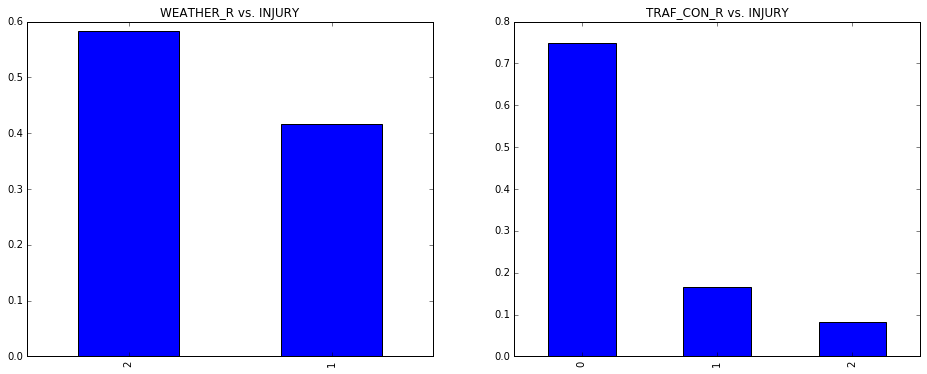

In [62]:
fig, axs = plt.subplots(1,2)
q82bi.WEATHER_R.value_counts('INJURY').plot(kind='bar',title='WEATHER_R vs. INJURY',ax=axs[0],figsize=(16,6))
q82bi.TRAF_CON_R.value_counts('INJURY').plot(kind='bar',title='TRAF_CON_R vs. INJURY',ax=axs[1],figsize=(16,6))

### Question 8.2 (b) ii.

In [63]:
injuries = accidents[accidents.INJURY==True]
prob_df = np.zeros((12,3))
count = 0
for val1 in sorted(pd.unique(injuries['WEATHER_R'])):
    weather_adjusted = injuries[injuries.WEATHER_R==val1]
    weather_adjusted2 = accidents[accidents.WEATHER_R==val1]
    for val2 in sorted(pd.unique(injuries['TRAF_CON_R'])):
        traf_adjusted = weather_adjusted[weather_adjusted.TRAF_CON_R==val2]
        traf_adjusted2 = weather_adjusted2[weather_adjusted2.TRAF_CON_R==val2]
        print "For WEATHER_R: %s and TRAF_CON_R: %s," % (val1,val2)," we get: ",len(traf_adjusted)/float(len(traf_adjusted2)) 
        prob_df[count][2] = (len(traf_adjusted)/float(len(traf_adjusted2)))
        prob_df[count][1] = val2
        prob_df[count][0] = val1
        count+=1
prob_df = pd.DataFrame(prob_df,columns=['WEATHER_R','TRAF_CON_R','INJURY_PROB'])

For WEATHER_R: 1 and TRAF_CON_R: 0,  we get:  0.503111033214
For WEATHER_R: 1 and TRAF_CON_R: 1,  we get:  0.553423927525
For WEATHER_R: 1 and TRAF_CON_R: 2,  we get:  0.531550068587
For WEATHER_R: 2 and TRAF_CON_R: 0,  we get:  0.443616253907
For WEATHER_R: 2 and TRAF_CON_R: 1,  we get:  0.500894454383
For WEATHER_R: 2 and TRAF_CON_R: 2,  we get:  0.430294906166


### Question 8.2 (b) iii.

In [64]:
new_df = pd.merge(q82bi,prob_df,on=['WEATHER_R','TRAF_CON_R'],how='left')
print new_df.head()

   WEATHER_R  TRAF_CON_R INJURY  INJURY_PROB
0          1           0   True     0.503111
1          2           0  False     0.443616
2          2           1  False     0.500894
3          1           1  False     0.553424
4          1           0  False     0.503111


In [65]:
new_df['Prediction'] = new_df.INJURY_PROB.apply(lambda x: x>0.50)
print new_df[['INJURY','Prediction']],"\n"
conf_mat = sklearn.metrics.confusion_matrix(new_df.INJURY,new_df.Prediction)
print "Confusion Matrix: \n",conf_mat
print "Accuracy: ",(conf_mat[0][0]+conf_mat[1][1])/float(12)
print "F1 Score: ", (2*conf_mat[0][0])/float(2*conf_mat[0][0]+conf_mat[1][0]+conf_mat[0][1])

   INJURY Prediction
0    True       True
1   False      False
2   False       True
3   False       True
4   False       True
5    True      False
6   False      False
7    True       True
8   False      False
9   False      False
10  False      False
11  False       True 

Confusion Matrix: 
[[5 4]
 [1 2]]
Accuracy:  0.583333333333
F1 Score:  0.666666666667


### Question 8.2 (b) iv.

In [66]:
weather_probability = len(injuries[injuries.WEATHER_R==1])/float(len(injuries))
traf_con_probability = len(injuries[injuries.TRAF_CON_R==1])/float(len(injuries))
print "WEATHER_R = 1 injury probability: ",weather_probability
print "TRAF_CON_R = 1 injury probability: ",traf_con_probability
print "Multiply these two to get the naive Bayes conditional probability for given both:", weather_probability*traf_con_probability

WEATHER_R = 1 injury probability:  0.872984810363
TRAF_CON_R = 1 injury probability:  0.219644021992
Multiply these two to get the naive Bayes conditional probability for given both: 0.191745894886


### Question 8.2 (b) v.

In [67]:
gnb = sklearn.naive_bayes.GaussianNB()
gnb.fit(accidents[['WEATHER_R','TRAF_CON_R']],accidents['INJURY'])
print "The mean accuracy value is: ",gnb.score(injuries[['WEATHER_R','TRAF_CON_R']],injuries['INJURY'])

The mean accuracy value is:  0.872984810363


### Question 8.2 (c) i.

In [70]:
print "The number of accidents is: ", len(accidents)
print "The number of accidents that led to injuries is: ", len(accidents[accidents.INJURY!=0])
print "The proportion of accidents that led to injuries is: ", len(accidents[accidents.INJURY!=0])/float(len(accidents))

The number of accidents is:  42183
The number of accidents that led to injuries is:  21462
The proportion of accidents that led to injuries is:  0.508783159093


### Question 8.2 (c) ii.

The following variables are all general conditions that have the ability to potentially cause an accident but have no information about the accident itself. (i.e. location, injuries, etc)

* HOUR_I_R = rush hour
* WRK_ZONE = work zone
* WKDY_I_R = weekday, weekend
* LGTCON_I_R = light conditions, light or dark
* SUR_COND = surface conditions
* WEATHER_R = weather

In [73]:
predictors = ['HOUR_I_R','WRK_ZONE','WKDY_I_R','LGTCON_I_R','SUR_COND','WEATHER_R']

### Question 8.2 (c) iii.

In [91]:
training_index = random.sample(range(len(accidents)),int(len(accidents)*0.80))
cv_index = list(set(range(len(accidents)))-set(training_index))
training_data = accidents.iloc[training_index].reset_index()
cross_val = accidents.iloc[cv_index].reset_index()

### Question 8.2 (c) iv.

In [93]:
gnb = sklearn.naive_bayes.GaussianNB()
gnb.fit(training_data[predictors],training_data['INJURY'])

GaussianNB(priors=None)

### Question 8.2 (c) v.

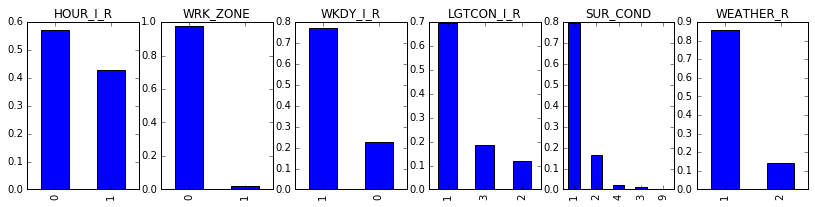

In [90]:
fig,axs=plt.subplots(1,6)
accidents.HOUR_I_R.value_counts('INJURY').plot(kind='bar',title='HOUR_I_R',ax=axs[0],figsize=(14,3))
accidents.WRK_ZONE.value_counts('INJURY').plot(kind='bar',title='WRK_ZONE',ax=axs[1],figsize=(14,3))
accidents.WKDY_I_R.value_counts('INJURY').plot(kind='bar',title='WKDY_I_R',ax=axs[2],figsize=(14,3))
accidents.LGTCON_I_R.value_counts('INJURY').plot(kind='bar',title='LGTCON_I_R',ax=axs[3],figsize=(14,3))
accidents.SUR_COND.value_counts('INJURY').plot(kind='bar',title='SUR_COND',ax=axs[4],figsize=(14,3))
accidents.WEATHER_R.value_counts('INJURY').plot(kind='bar',title='WEATHER_R',ax=axs[5],figsize=(14,3))

Therefore, the highest probability from the GNB classifier would be HOUR_I_R = 0, WRK_ZONE = 0, WKDY_I_R = 1, LGTCON_I_R = 1, SUR_COND = 1, WEATHER_R = 1. The reason we know this from the graph is because GNB makes the strong assumption that variables are independent. Therefore, we just pick the highest probabilities in each category to get the most likely condition for injuries.

### Question 8.2 (c) vi.

In [94]:
print "The mean accuracy value is: ",gnb.score(cross_val[predictors],cross_val['INJURY'])

The mean accuracy value is:  0.517008415314


The mean accuracy value is shown above.

## Question 9.3

### Question 9.3 (a) i.

In [42]:
toyota = pd.read_csv('ToyotaCorolla.csv',sep=',',header=0)
toyota.head()

,﻿Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Validation
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,Validation
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,Validation
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,Training
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,Training
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,Validation


In [34]:
f = open('data_mining_2_9.txt','r')
for line in f.readlines():
    print line



Regression tree:

tree(formula = Price ~ Age_08_04 + KM + Fuel_Type + HP + Automatic + 

    Doors + Quarterly_Tax + Mfg_Guarantee + Guarantee_Period + 

    Airco + Automatic_airco + CD_Player + Powered_Windows + Sport_Model + 

    Tow_Bar, data = train, control = tree.control(nobs = nrow(train), 

    mincut = 1, minsize = 2, mindev = 0))

Number of terminal nodes:  577 

Residual mean deviance:  804.8 = 113500 / 141 

Distribution of residuals:

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 

 -66.67    0.00    0.00    0.00    0.00   55.00 

[1] "R^2 value for training data:"

[1] 1.325046e-05

[1] "RMSE value for training data:"

[1] 12.57132

[1] "R^2 value for cross validation data:"

[1] 0.1309703

[1] "RMSE value for cross validation data:"

[1] 1568.045

[1] "R^2 value for test data:"

[1] 0.07554466

[1] "RMSE value for test data:"

[1] 1510.963



Regression tree:

snip.tree(tree = tree1, nodes = 2:3)

Variables actually used in tree construction:

[1] "Age_08_04"

Numb

### Question 9.3 (a) i.

The RSquare and RMSE for the training, validation, and test sets initially get better all across the board. As more splits occur, we expect to see better performance for all data sets. However, as the tree begins to overfit on the training data, we will notice an increase in error on the cross validation and test data sets. If we look at the initial performance metrics, we can see that the fully fit tree has a near zero error rate with incredibly low RMSE. However, the truth is quickly unmasked as we move on to the RMSE and R Square for the cross validation and test data sets. The RSquares are much worse and the RMSE is much higher. This makes sense since the tree is overfitting to the training data and has yet to see the cross validation or test data.

### Question 9.3 (a) ii.

The performance of the test set is comparable to the cross validation set on these measures. This is because the model is only trained on the training data and we have yet to introduce any corrections based on cross validating our model. Therefore, the cross validation set is as pure as the test set and we expected the error values and metrics to be fairly similar. The training set's performance is much better than the test set's performance because the model was trained/built on the training data. Furthermore, the training set has been fully fit due to the initial condition of a minimum split size of 1. The tree itself is being fully fully fit to the data. Therefore, if anything even deviates slightly from the training data, the current model will do a relatively bad job of predicting its true value most likely.

In [44]:
predictors = ['Age_08_04','KM','Fuel_Type','HP','Automatic','Doors','Quarterly_Tax','Mfg_Guarantee',
              'Guarantee_Period','Airco','Automatic_airco','CD_Player','Powered_Windows','Sport_Model','Tow_Bar']
predicted = ['Price']
toyota.Fuel_Type = sklearn.preprocessing.LabelEncoder().fit_transform(toyota.Fuel_Type)
train_X,cv_X,train_Y,cv_Y = sklearn.cross_validation.train_test_split(toyota[predictors],toyota[predicted],test_size=0.5)
cv_X,test_X,cv_Y,test_Y = sklearn.cross_validation.train_test_split(cv_X,cv_Y,test_size=0.4)
print "Train: ",len(train_Y),"CV: ",len(cv_Y),"Test: ",len(test_Y)
model = sklearn.tree.DecisionTreeRegressor() #the minimum number of samples for a leaf is 
model = model.fit(train_X,train_Y)

for i in range(len(predictors)):
    print sorted(zip(predictors,model.feature_importances_),
                 key = lambda t: t[1],reverse=True)[i]

Train:  718 CV:  430 Test:  288
('Age_08_04', 0.83464294344134393)
('Quarterly_Tax', 0.061721940272802991)
('KM', 0.034842966997827109)
('Automatic_airco', 0.017208299628327647)
('HP', 0.016872926365754451)
('Airco', 0.005610071001437374)
('Doors', 0.0052338925118335829)
('Sport_Model', 0.0047084961085279353)
('Powered_Windows', 0.0043800800903836248)
('Mfg_Guarantee', 0.0037382162863541864)
('CD_Player', 0.0034369721070763265)
('Tow_Bar', 0.0032867980135773888)
('Automatic', 0.002317640293379736)
('Guarantee_Period', 0.0015316869973668555)
('Fuel_Type', 0.00046706988400677368)


### Question 9.3 (a) iii.
Age_08_04 is consistently the most impportant feature among all of the trees. An R and Python analysis show that changes in Age_08_04 is by far most indicative of price changes. From here, we can see that there is a little impact from Quarterly_Tax and KM. However, after those three, the remaining variables have very little feature importance.

### Question 9.3 (a) iv.
The resulting split simply queried whether or not the Age_08_04 was less than 32.5. If it was younger, the value predicted was twice as great as the alternative case. Furthermore, I ran a quick evaluation of the validation R^2 with respect to the number of splits and received the below graph. We can clearly see that a normal decision tree fails to capture more information as splits increase in number.

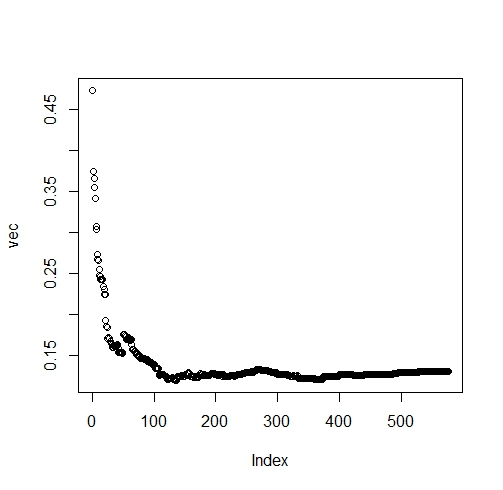

In [19]:
from IPython.display import Image
Image('validation_r2_v_splits.jpeg')

### Question 9.3 (a) v.
The final tree splits into two leaves according to the analysis above.

### Question 9.3 (a) vi.
The RSquare and RMSE for the training, validation and test sets for the reduced model. A very interesting observation is the fact that the RMSE has gone up a bit by about 33%. Meanwhile the R^2 has increased dramatically in the validation and test sets compared to before. Furthermore, as expected, since the model is no longer overfit to the training data set so the R^2 decreases considerably compared to the initial unpruned model.

### Question 9.3 (a) vii.
From a theoretical standpoint, the pruned model would be the best for making predictions due to the higher R^2 value. However, from an empirical standpoint, the better model would be the overfit, unpruned model. Yes, we would much rather be able to explain what is going on within the data. However, from a buyer perspective who is trying to predict price, a person would much rather have a lower RMSE. In essence, a buyer would want to make sure he's not overpaying while a data scientist would want to be able to explain how prices are determined. 

# Feedback

I ended up receiving my assignment back and got points off which just goes to show that, no matter how much experience I might have, it's always better not to overestimate my own ability. Something that I got wrong was the fact that I forgot to show that robustness is shown when there is minimal difference between the training R^2 and the cross validation R^2. This intuitively makes sense because the model should not suddenly explain more or less of the cross validation data based on the training data. This really surprised me and stuck with me because it's something so basic and makes so much sense and yet I have never seen it before.